In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#reading csv file
df1 = pd.read_csv("data/coinmarketcap_06122017.csv")
df2 = pd.read_csv("data/coinmarketcap_06012018.csv")

In [78]:
df1.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [5]:
 df2.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,22081300000,1.678522e+07,bitcoin,1515230661,2.850000e+11,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,1.678522e+07
1,1,5221370000,3.873914e+10,ripple,1515230641,1.190000e+11,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,9.999309e+10
2,2,5705690000,9.680384e+07,ethereum,1515230649,1.000000e+11,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,9.680384e+07
3,3,1569900000,1.689622e+07,bitcoin-cash,1515230652,4.442406e+10,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,1.689622e+07
4,4,428305000,2.592707e+10,cardano,1515230654,2.591665e+10,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,3.111248e+10


In [6]:
# df2.dtypes
df1.dtypes

Unnamed: 0              int64
24h_volume_usd        float64
available_supply      float64
id                     object
last_updated            int64
market_cap_usd        float64
max_supply            float64
name                   object
percent_change_1h     float64
percent_change_24h    float64
percent_change_7d     float64
price_btc             float64
price_usd             float64
rank                    int64
symbol                 object
total_supply          float64
dtype: object

In [8]:
# filtering the dataset, by removing the unnamed column in df1
df1.drop('Unnamed: 0',axis = 1,inplace=True)
#df1_f = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df1

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [79]:
#filteringthe datatset by removing the unnamed column in df2
#df2_f = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
#df2_f
df2.drop('Unnamed: 0',axis = 1,inplace=True)
df2

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,22081300000,1.678522e+07,bitcoin,1515230661,2.850000e+11,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,1.678522e+07
1,5221370000,3.873914e+10,ripple,1515230641,1.190000e+11,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,9.999309e+10
2,5705690000,9.680384e+07,ethereum,1515230649,1.000000e+11,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,9.680384e+07
3,1569900000,1.689622e+07,bitcoin-cash,1515230652,4.442406e+10,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,1.689622e+07
4,428305000,2.592707e+10,cardano,1515230654,2.591665e+10,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,3.111248e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,33186200,6.173142e+08,quantstamp,1515230657,3.291031e+08,NaN,Quantstamp,1.90,8.96,136.70,0.000032,0.533121,96,QSP,9.764424e+08
96,51006100,5.014894e+07,raiden-network-token,1515230656,3.171359e+08,NaN,Raiden Network Token,1.27,2.29,59.57,0.000382,6.323880,97,RDN,1.000000e+08
97,11258600,6.435535e+07,gamecredits,1515230643,3.141803e+08,NaN,GameCredits,0.07,2.95,19.36,0.000295,4.881960,98,GAME,6.435535e+07
98,28523900,7.561925e+08,enjin-coin,1515230656,3.087073e+08,NaN,Enjin Coin,0.87,-0.61,170.82,0.000025,0.408239,99,ENJ,1.000000e+09


In [13]:
df1.describe()

,24h_volume_usd,available_supply,last_updated,market_cap_usd,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,total_supply
count,1.270000e+03,1.031000e+03,1.326000e+03,1.031000e+03,2.150000e+02,1273.000000,1270.000000,1283.000000,1.326000e+03,1.326000e+03,1326.000000,1.211000e+03
mean,1.645593e+07,8.657165e+09,1.512545e+09,3.630503e+08,4.655418e+12,1.052435,8.655677,29.536539,3.397067e-02,4.252208e+02,663.500000,7.849645e+11
std,2.740461e+08,1.140542e+11,3.793006e+04,6.844947e+09,6.819914e+13,12.005501,44.010749,121.155058,8.793567e-01,1.100295e+04,382.927539,2.650661e+13
min,8.678570e-02,0.000000e+00,1.511626e+09,1.000000e+01,3.000000e+02,-70.850000,-95.850000,-99.590000,2.000000e-12,2.790000e-08,1.000000,1.000000e+00
25%,3.200618e+02,5.012184e+06,1.512550e+09,1.880625e+05,2.150000e+07,-0.170000,-6.632500,-7.775000,3.700000e-07,4.629540e-03,332.250000,8.768462e+06
50%,4.935380e+03,2.239625e+07,1.512550e+09,1.488564e+06,1.000000e+08,0.520000,1.820000,11.430000,3.905000e-06,4.886040e-02,663.500000,4.233708e+07
75%,2.089422e+05,1.112813e+08,1.512550e+09,1.546756e+07,6.585774e+08,0.970000,11.662500,35.645000,3.712500e-05,4.615170e-01,994.750000,2.544898e+08
max,9.007640e+09,3.209033e+12,1.512550e+09,2.130493e+11,1.000000e+15,232.310000,833.010000,3360.710000,3.145070e+01,3.935200e+05,1326.000000,9.223424e+14


In [14]:
df2.describe()

,24h_volume_usd,available_supply,last_updated,market_cap_usd,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,total_supply
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,2.700000e+01,100.000000,100.000000,100.00000,1.000000e+02,100.000000,100.000000,1.000000e+02
mean,5.313066e+08,4.397273e+10,1.515231e+09,7.605920e+09,3.110966e+11,0.051700,11.169200,112.12080,1.605252e-02,269.864235,50.500000,1.641030e+11
std,2.354403e+09,2.636864e+11,5.135920e+00,3.234186e+10,1.537155e+12,2.592407,34.088136,228.17529,1.013187e-01,1718.394444,29.011492,1.066192e+12
min,3.895190e+05,6.452220e+05,1.515231e+09,2.995155e+08,1.890000e+07,-8.850000,-20.830000,-16.09000,1.000000e-08,0.000230,1.000000,1.000000e+06
25%,1.983332e+07,5.478988e+07,1.515231e+09,4.613692e+08,6.862612e+07,-1.007500,-3.085000,16.17250,4.352500e-05,0.720028,25.750000,8.234886e+07
50%,4.442795e+07,2.045273e+08,1.515231e+09,7.297321e+08,8.880000e+08,0.150000,0.390000,53.49500,2.461700e-04,4.072385,50.500000,2.683499e+08
75%,1.713828e+08,1.502973e+09,1.515231e+09,1.980319e+09,1.007779e+10,1.270000,11.662500,124.27500,1.547798e-03,25.605125,75.250000,2.039180e+09
max,2.208130e+10,2.510000e+12,1.515231e+09,2.850000e+11,8.000000e+12,6.940000,210.410000,2099.78000,1.000000e+00,16973.800000,100.000000,1.000000e+13


In [80]:
df1.isnull().sum()

24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

In [50]:
#dropping coins/rows with null values in marke capitalization column in df 1

df1['market_cap_usd'].dropna(how='any',axis=0)

0       2.130493e+11
1       4.352945e+10
2       2.529585e+10
3       1.475225e+10
4       9.365343e+09
            ...     
1026    2.510000e+02
1027    1.360000e+02
1028    1.000000e+02
1029    2.300000e+01
1030    1.000000e+01
Name: market_cap_usd, Length: 1031, dtype: float64

In [64]:
df1.dropna(how='any').isnull().sum()

24h_volume_usd        0
available_supply      0
id                    0
last_updated          0
market_cap_usd        0
max_supply            0
name                  0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
price_btc             0
price_usd             0
rank                  0
symbol                0
total_supply          0
dtype: int64

In [77]:
# alternative ways to remove null values
# df1[df1.market_cap_usd.notnull()]
# df1[df1.market_cap_usd > 0]
df1.query('market_cap_usd > 0')

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,NaN,2.753201e+06,future-digital-currency,1512318861,2.510000e+02,NaN,Future Digital Currency,NaN,NaN,-3.55,8.000000e-09,0.000091,1027,FDC,1.002753e+09
1027,5.108100e-01,1.327175e+08,environ,1512549571,1.360000e+02,NaN,Environ,-0.23,-0.02,-47.88,8.000000e-11,0.000001,1028,ENV,9.327175e+08
1028,4.271860e+01,8.714000e+04,caliphcoin,1512549561,1.000000e+02,1.890000e+08,CaliphCoin,0.54,53.88,67.27,9.000000e-08,0.001145,1029,CALC,1.485871e+08
1029,NaN,1.967660e+05,falcoin,1512481172,2.300000e+01,2.000000e+08,Falcoin,NaN,0.99,-71.64,1.000000e-08,0.000119,1030,FAL,1.701968e+08


In [24]:
#removing null values on the market capitalization column in df2
df2.query('market_cap_usd > 0')

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,22081300000,1.678522e+07,bitcoin,1515230661,2.850000e+11,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,1.678522e+07
1,5221370000,3.873914e+10,ripple,1515230641,1.190000e+11,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,9.999309e+10
2,5705690000,9.680384e+07,ethereum,1515230649,1.000000e+11,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,9.680384e+07
3,1569900000,1.689622e+07,bitcoin-cash,1515230652,4.442406e+10,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,1.689622e+07
4,428305000,2.592707e+10,cardano,1515230654,2.591665e+10,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,3.111248e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,33186200,6.173142e+08,quantstamp,1515230657,3.291031e+08,NaN,Quantstamp,1.90,8.96,136.70,0.000032,0.533121,96,QSP,9.764424e+08
96,51006100,5.014894e+07,raiden-network-token,1515230656,3.171359e+08,NaN,Raiden Network Token,1.27,2.29,59.57,0.000382,6.323880,97,RDN,1.000000e+08
97,11258600,6.435535e+07,gamecredits,1515230643,3.141803e+08,NaN,GameCredits,0.07,2.95,19.36,0.000295,4.881960,98,GAME,6.435535e+07
98,28523900,7.561925e+08,enjin-coin,1515230656,3.087073e+08,NaN,Enjin Coin,0.87,-0.61,170.82,0.000025,0.408239,99,ENJ,1.000000e+09


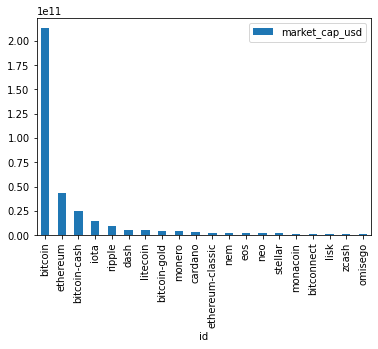

In [115]:
#plotting a bar chart to show how big bitcoin is, compared to other coins in df1
len(df1.id.unique())
df1.shape, 
df1_a = df1.query('market_cap_usd > 0')[['id','market_cap_usd']].sort_values('market_cap_usd', ascending = False,)
df1_a = df1_a.set_index('id')
# df1_a[:10].plot(kind ='bar')     
df1_a[:20].plot(kind ='bar');

### From graph above shows the high level of volatility in cryptocurriencies as well as the major difference between bitcoin and ethereum, and other cryptocurrencies respectively in the december 2017

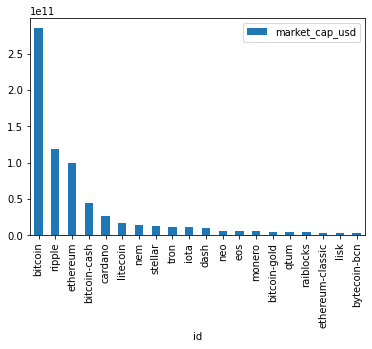

In [30]:
#comparing how big bitcoin is to other coins in df2
df2_a = df2.query('market_cap_usd > 0')[['id','market_cap_usd']].sort_values('market_cap_usd', ascending = False,)
df2_a = df2_a.set_index('id')
df2_a[:20].plot(kind='bar');

### From graph above, it shows that in december 2018, bitcoin still maintained a high market capitalization, although ripple coin had a market capitalization that was higher than that of ethereum and the other cryptocurrencies respctively

In [31]:
#df1_b = df1.query('market_cap_usd > 0')[['id','market_cap_usd']].sort_values('market_cap_usd', ascending = False,)
# df1_b.share = df1_b.apply(lambda x:x/x.sum()*100)
#market_cap_raw.set_index('id').apply(lambda x:x/x.sum*100)
# market_cap_raw = df1.query('market_cap_usd > 0')[['id','market_cap_usd']].sort_values('market_cap_usd', ascending = False,)
#coverting the market_cap_usd to percentage
market_cap_raw.set_index('id').apply(lambda x:x/x.sum()*100)



,market_cap_usd
id,
bitcoin,5.691867e+01
ethereum,1.162941e+01
bitcoin-cash,6.758088e+00
iota,3.941238e+00
ripple,2.502063e+00
...,...
future-digital-currency,6.705764e-08
environ,3.633402e-08
caliphcoin,2.671619e-08


<AxesSubplot:>

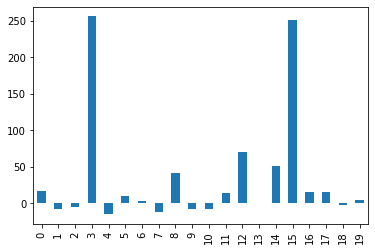

In [110]:
# The rate of change of the coins within 7days, for the first 20 coins
df1.percent_change_7d[:20].plot(kind ='bar')

### The aim of the plot above was used to check the weekly series of the percentage change of the prices of the cryptocurrencies at 6th of december 2017

<AxesSubplot:>

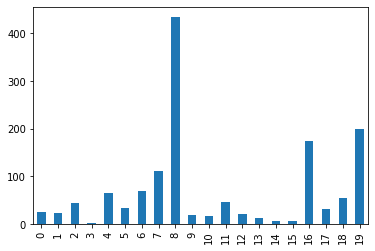

In [39]:
#graphical representation of the rate of change in the coins with 7 days for the first 20 coins
df2.percent_change_7d[:20].plot(kind ='bar')

### weekly percentage change of the coins at 6th of december 2018

<AxesSubplot:xlabel='id'>

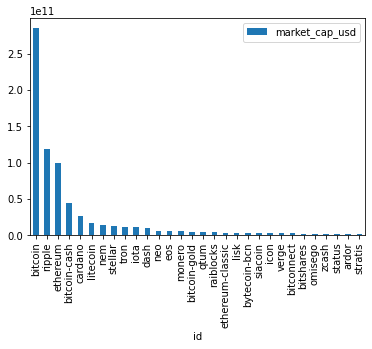

In [116]:
df2_a = df2.query('market_cap_usd > 0')[['id','market_cap_usd']].sort_values('market_cap_usd', ascending = False,)
df2_a = df2_a.set_index('id')
df2_a[:30].plot(kind='bar')